<a href="https://colab.research.google.com/github/be1le/Deep-Learning/blob/master/DL_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Recurrent Neural Network
**작성자:유성훈**
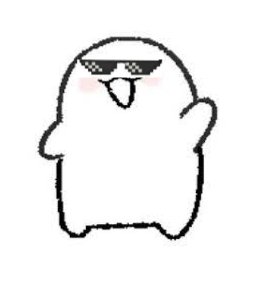

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the training  set

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv') 
training_set = dataset_train.iloc[:, 1:2].values #iloc[:, 1:2].values인 이유는 넘파이배열을 만들기 위하여.

## Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler #클래스 객체를 만들때 사용.
sc = MinMaxScaler(feature_range = (0, 1))#모든 범위를 0~1  사이로 바꿔주기
training_set_scaled = sc.fit_transform(training_set)

## Creating a data structure with 60 timesteps and 1 output

In [5]:
X_train = [] #T+1 이전 60개의 주가 
y_train = [] #T+1
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
#시간 T+1에 다음 값을 예측하기 위해 이전60개의 타임스텝을 참조한다. 

# Reshaping
# 3D tensor배열로 만들어주어야 하기때문 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



# Building the RNN

## Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential #시퀀셜 신경망을 만드는 class
from keras.layers import Dense #출력층을 추가하는 class
from keras.layers import LSTM # LSTM (Long Short Term Memory)는 기존의 RNN이 출력과 먼 위치에 있는 정보를 기억할 수 없다는 단점을 보완하여 장/단기 기억을 가능하게 설계한 신경망의 구조 class
from keras.layers import Dropout #과적합방지

##Initialising the RNN

In [7]:
regressor = Sequential()
#순환 신경망을 초기화하기.

## Adding the first LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#LSTM의 3가지 인수
#1.LSTM층의 cell수 == 50
#2.반환 시퀀스 인수 == return_sequences = True
#3.input구조 조정 3D tensor구조 중에서 예측변수,지표만 가져오기.
regressor.add(Dropout(0.2))


## Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))# 20%의 비율로 렌덤한 노드와의 연결을 끊는다. 

##Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

## Adding the output layer

In [13]:
regressor.add(Dense(units = 1))
#units = 1 인이유는 T+1 시점하나만(1차원) 예측하면 되기때문.

## Compiling the RNN

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting the RNN to the Training set 

In [16]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 124ms/step - loss: 0.0349
Epoch 2/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0056
Epoch 7/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 7s 179ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0040
Epoch 13/100

# Making the predictions and visualising the results

## Getting the real stock price of 2017

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
#예측값과 비교를 위한 실제 주가를 가져오기.

## Getting the predicted stock price of 2017

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# pd.concat function으로 훈련집합 + 테스트 세트를 수직방향(axis = 0)으로 합쳐준다.
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1) 
#reshape(-1,1)로 입력에 대한 tf3D구조로 만들기 
inputs = sc.transform(inputs)
#입력값만 스케일링하는 구문. 

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#for문을 돌면서 예측값이 predicted_stock_price변수에 저장된다. 


## Visualising the results

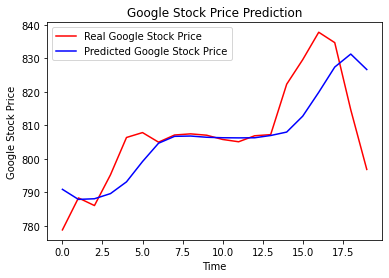

In [19]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()